# Curvas de Calibração Fuzzy para Previsão da Concentração de Soluções

In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CPU times: total: 156 ms
Wall time: 1.75 s


### Tratamento de dados

In [2]:
%%time

df = pd.read_csv("CoCl2_Glauber_Yasmin.txt", sep = ";", skiprows = 20)

df = df[:63]
concentracao_CoCl2 = [0, 2, 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
concentracao_final = concentracao_CoCl2[1:]

concentracao = []
for x in concentracao_CoCl2:
        concentracao.append(x)
        concentracao.append(x)
        concentracao.append(x)

df["Concentração"] = concentracao
df = df.rename(columns={'A492': 'Absorbância'})
df

CPU times: total: 15.6 ms
Wall time: 17.6 ms


,Well,Name,Absorbância,Concentração
0,A1,Sample 1.1,0.029,0.0
1,A2,Sample 1.2,0.031,0.0
2,A3,Sample 1.3,0.028,0.0
3,A4,Sample 1.4,2.866,2.0
4,A5,Sample 1.5,2.850,2.0
...,...,...,...,...
58,E11,Sample 1.59,0.322,0.2
59,E12,Sample 1.60,0.330,0.2
60,F1,Sample 1.61,0.205,0.1
61,F2,Sample 1.62,0.194,0.1


In [3]:
%%time

from lei_de_lambert_fuzzy import trata_dados, trata_dados_fuzzy

absorb = df["Absorbância"]

absorb_final, desv_final = trata_dados(absorb)
absorb_fuzzy = trata_dados_fuzzy(absorb)

CPU times: total: 0 ns
Wall time: 0 ns


In [4]:
%%time

i_data = set(range(3, 8)) | set(range(9, 14)) | set(range(15, 20))

i_total = set(range(20))

i_prev = i_total - i_data

xr_data = np.array([concentracao_final[i] for i in i_data])
xr_prev = np.array([concentracao_final[i] for i in i_prev])
yr_data = np.array([absorb_final[i] for i in i_data])
yr_err = np.array([desv_final[i] for i in i_data])

yr_prev = np.array([absorb_final[i] for i in i_prev])
yr_err_prev = np.array([desv_final[i] for i in i_prev])

xf_data = np.array([concentracao_final[i] for i in i_data]).reshape(-1, 1)
xf_prev = np.array([concentracao_final[i] for i in i_prev]).reshape(-1, 1)
yf_data = np.array([absorb_fuzzy[i] for i in i_data])
yf_prev = np.array([absorb_fuzzy[i] for i in i_prev])

CPU times: total: 0 ns
Wall time: 0 ns


### Ajuste e previsão clássicos

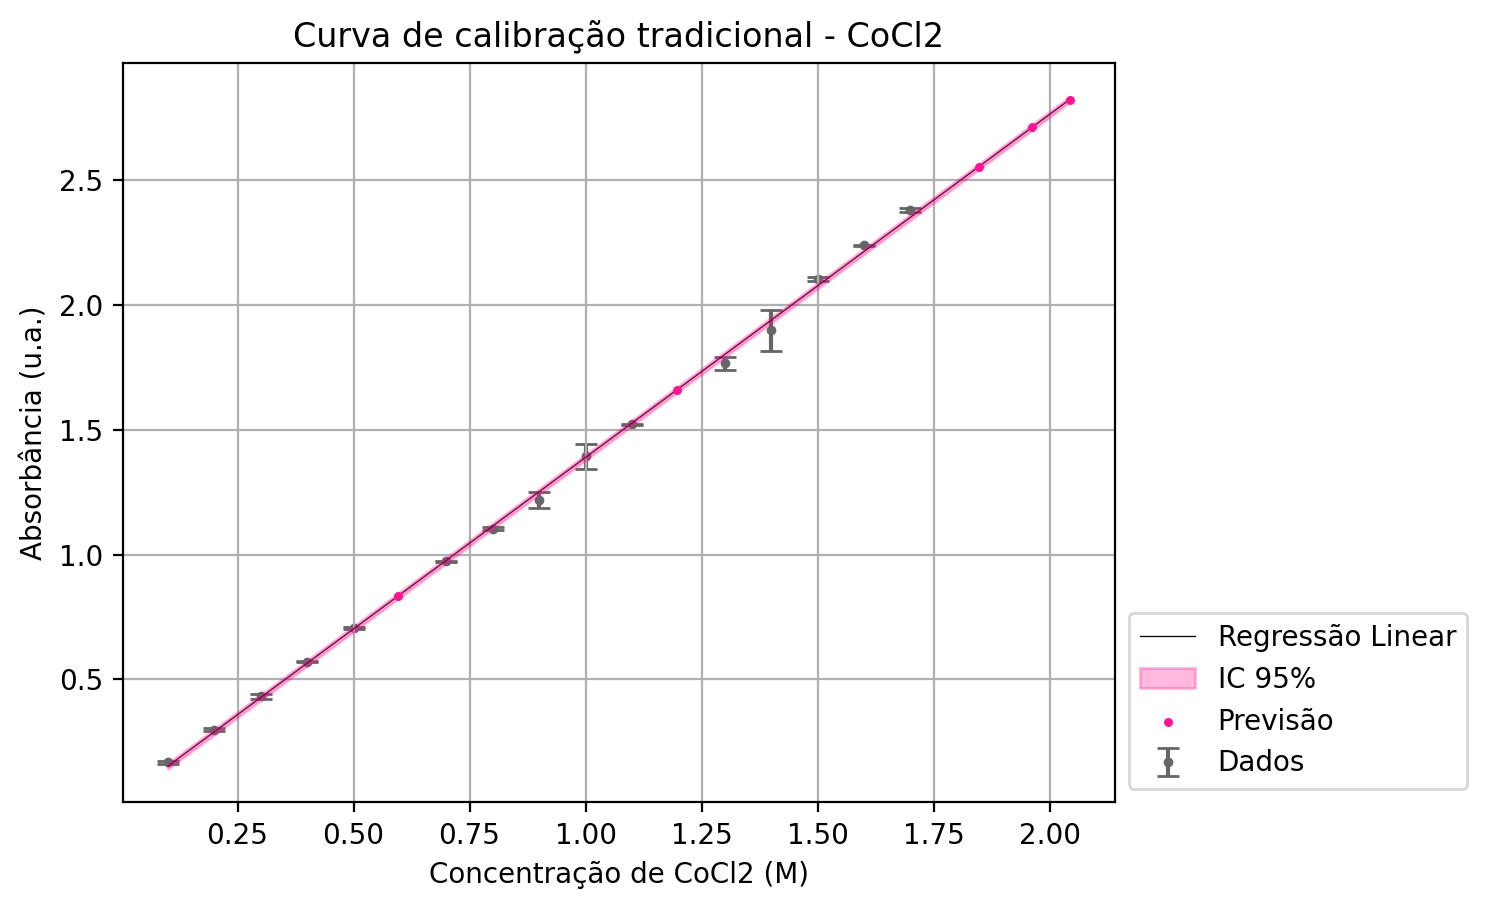

CPU times: total: 281 ms
Wall time: 598 ms


In [5]:
%%time

from lei_de_lambert_fuzzy import lei_lambert

title = "Curva de calibração tradicional - CoCl2"

coefs, conc_prev = lei_lambert(xr_data, yr_data, yr_err, abs_prev = yr_prev, titulo = title, xlabel = "Concentração de CoCl2 (M)", ylabel = "Absorbância (u.a.)")

### Ajuste e previsão Fuzzy

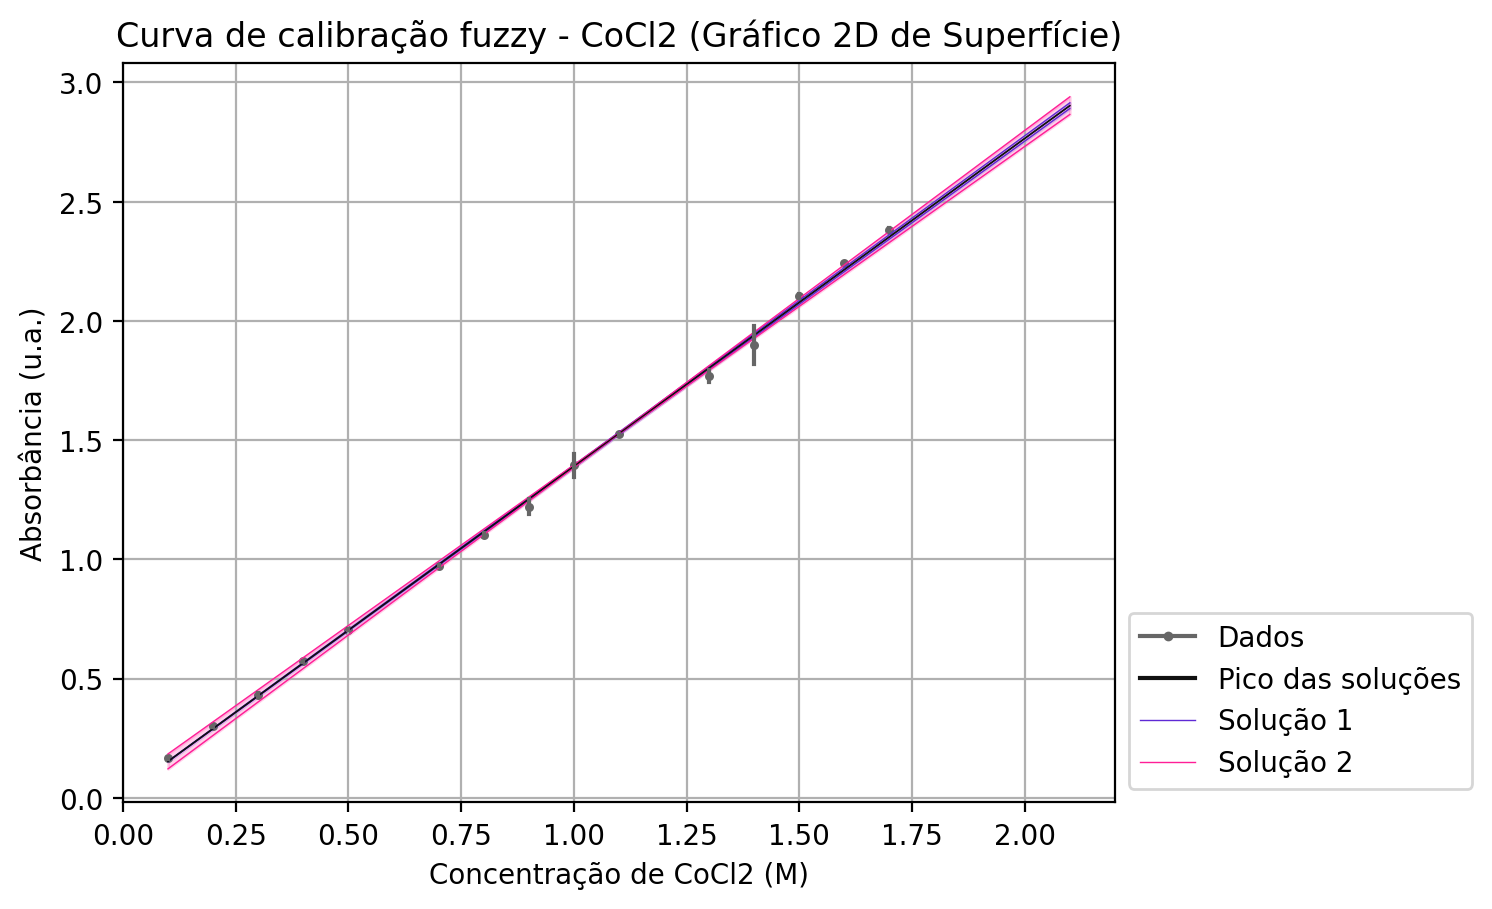

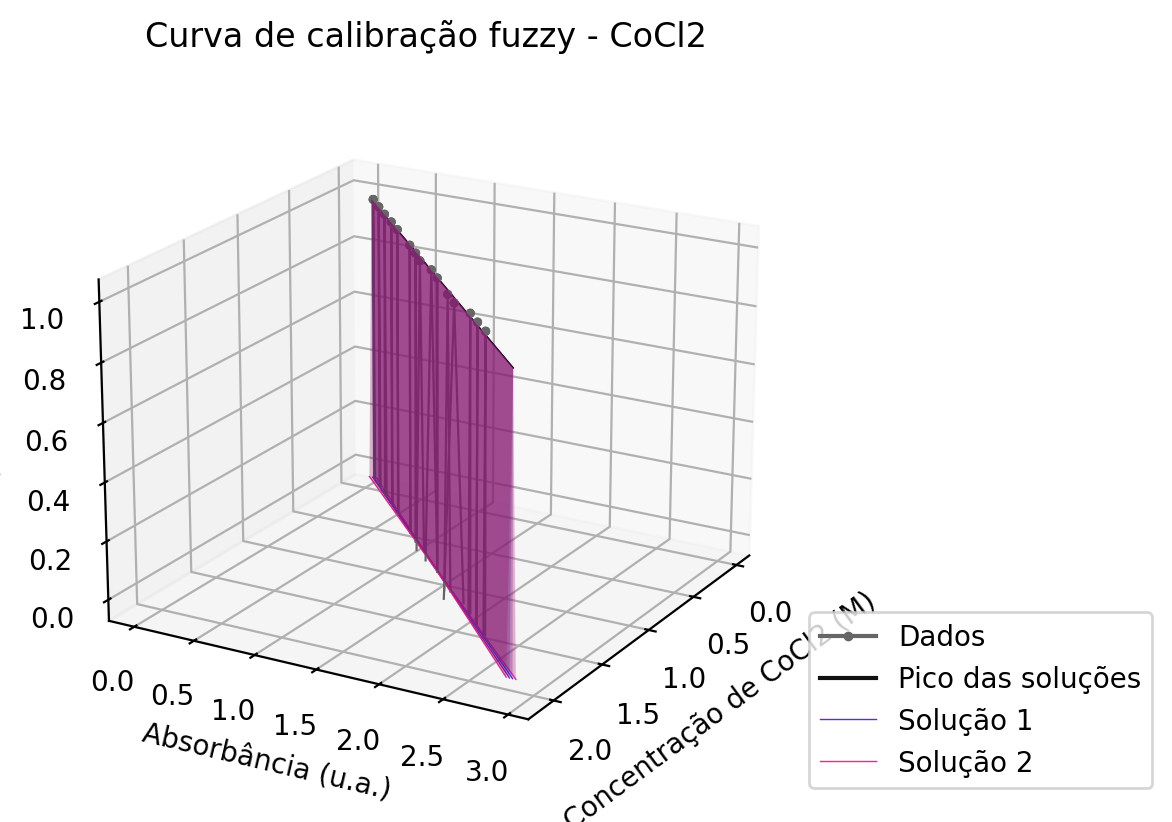

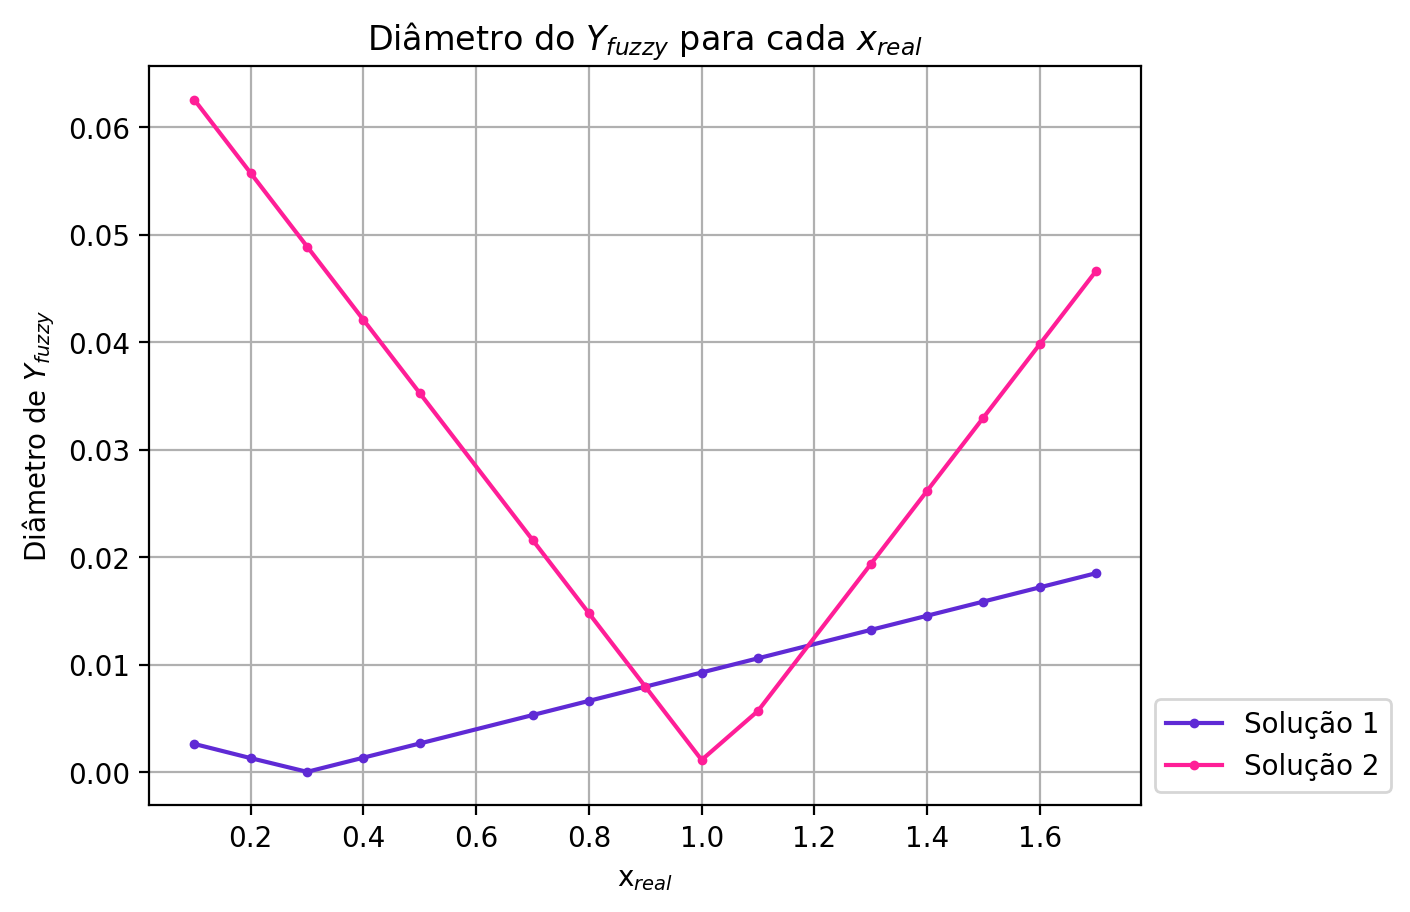

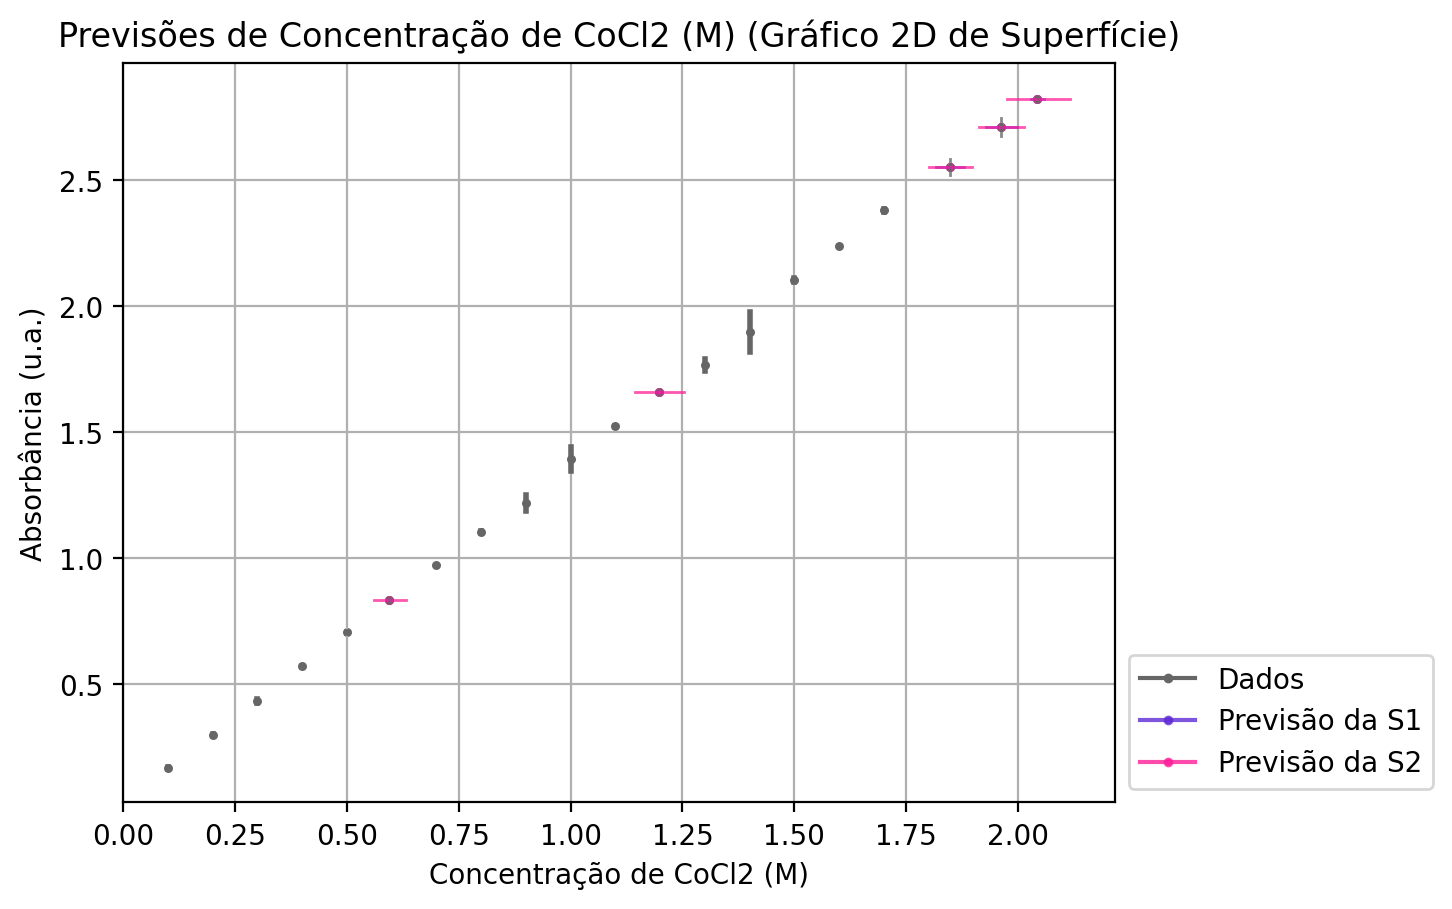

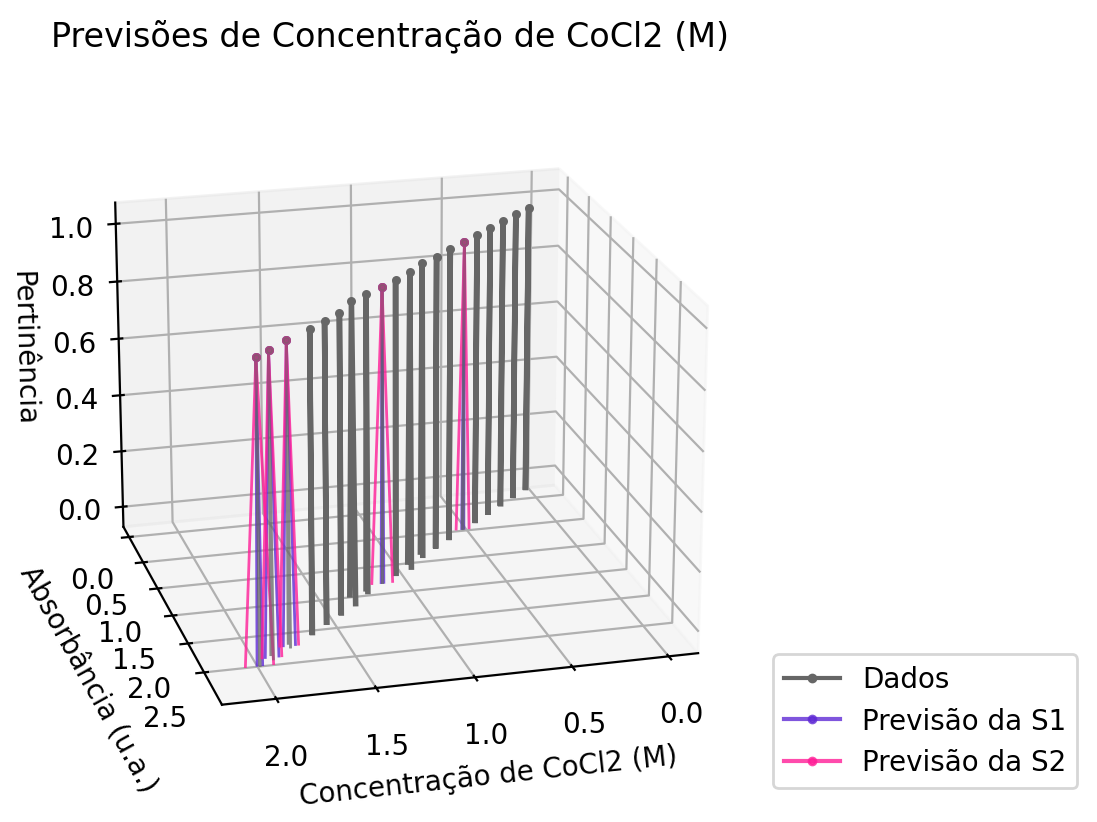

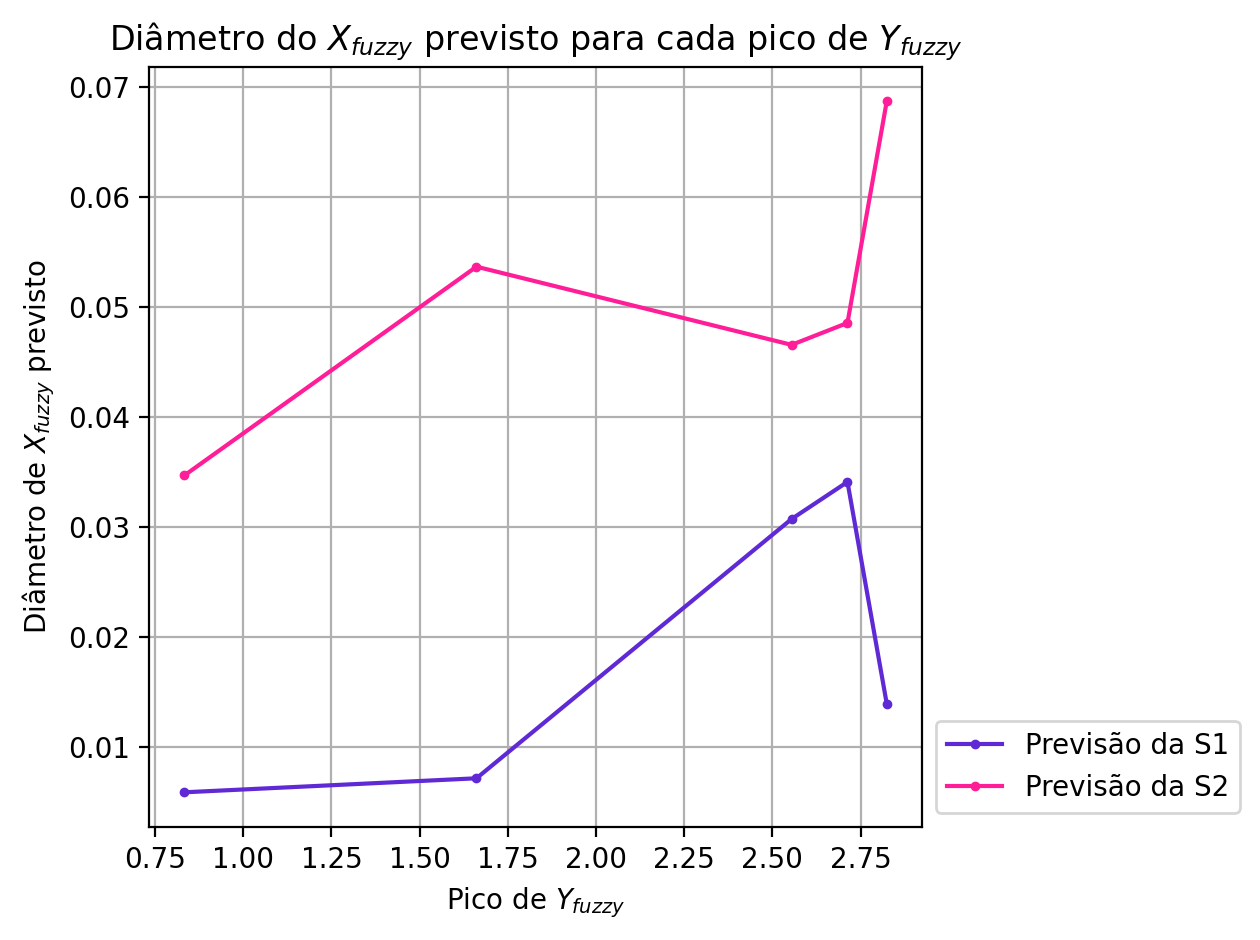

CPU times: total: 1.78 s
Wall time: 3.98 s


In [6]:
%%time

from lei_de_lambert_fuzzy import lei_lambert_fuzzy

title = "Curva de calibração fuzzy - CoCl2"

sol, xp = lei_lambert_fuzzy(xf_data, yf_data, y_prev = yf_prev, titulo = title, xlabel = "Concentração de CoCl2 (M)", ylabel = "Absorbância (u.a.)")

## Resultados obtidos

In [7]:
%%time

from lei_de_lambert_fuzzy import representacao_triangular

xpt1 = [representacao_triangular(x) for x in xp[0]]
xpt2 = [representacao_triangular(x) for x in xp[1]]

CPU times: total: 0 ns
Wall time: 0 ns


In [8]:
%%time

from lei_de_lambert_fuzzy import real2fuzzy, metr_hausdorff, metr_maximo, media

x_fuzzy = [real2fuzzy(xr_prev[i], 1001) for i in range(5)]
x1 = xp[0]
x2 = xp[1]

erros_real = []
erros1 = []
erros2 = []
difs = [] 

for i in range(5):
    er = metr_maximo([xr_prev[i]], [conc_prev[i]])
    erros_real.append(er)
    
    e1 = metr_hausdorff(x1[i], x_fuzzy[i])
    erros1.append(e1)
    
    e2 = metr_hausdorff(x2[i], x_fuzzy[i])
    erros2.append(e2)
    
    dif = abs(e1 - e2)
    difs.append(dif)
    
err_real = media(erros_real)
err1 = media(erros1)
err2 = media(erros2)
dif_med = media(difs)

CPU times: total: 0 ns
Wall time: 10.3 ms


------- REGRESSÃO LINEAR -------
 
Coeficientes do ajuste de curva real:
[0.015200854700854432, 1.3748632478632477]
 
Coeficientes fuzzy da Solução 1 para o ajuste de curva fuzzy:
[[1.36826 1.37486 1.38147]
 [0.01323 0.0152  0.01717]]
 
Coeficientes fuzzy da Solução 2 para o ajuste de curva fuzzy:
[[ 1.34073  1.37486  1.409  ]
 [-0.0195   0.0152   0.0499 ]]
 
 
--- PREVISÃO DE CONCENTRAÇÃO ---
 
Concentrações reais para previsão:
[2.  1.9 1.8 1.2 0.6]
 
Previsão de concentração real:
[2.043208648568001, 1.9622308978670766, 1.8470679290558818, 1.1973063366053505, 0.595064621811649]
 
Previsão de concentração fuzzy pela solução 1:
[(2.029283203086009, 2.0432140969504777, 2.0572645550549153), (1.928153967950594, 1.9622361549539589, 1.9966330506594456), (1.8163603833604713, 1.847072914090647, 1.8780684625234554), (1.1901549315825415, 1.197309786693433, 1.204524968451415), (0.5891853235118826, 0.5950666492103439, 0.6010004076671878)]
 
Previsão de concentração fuzzy pela solução 2:
[(1.9745

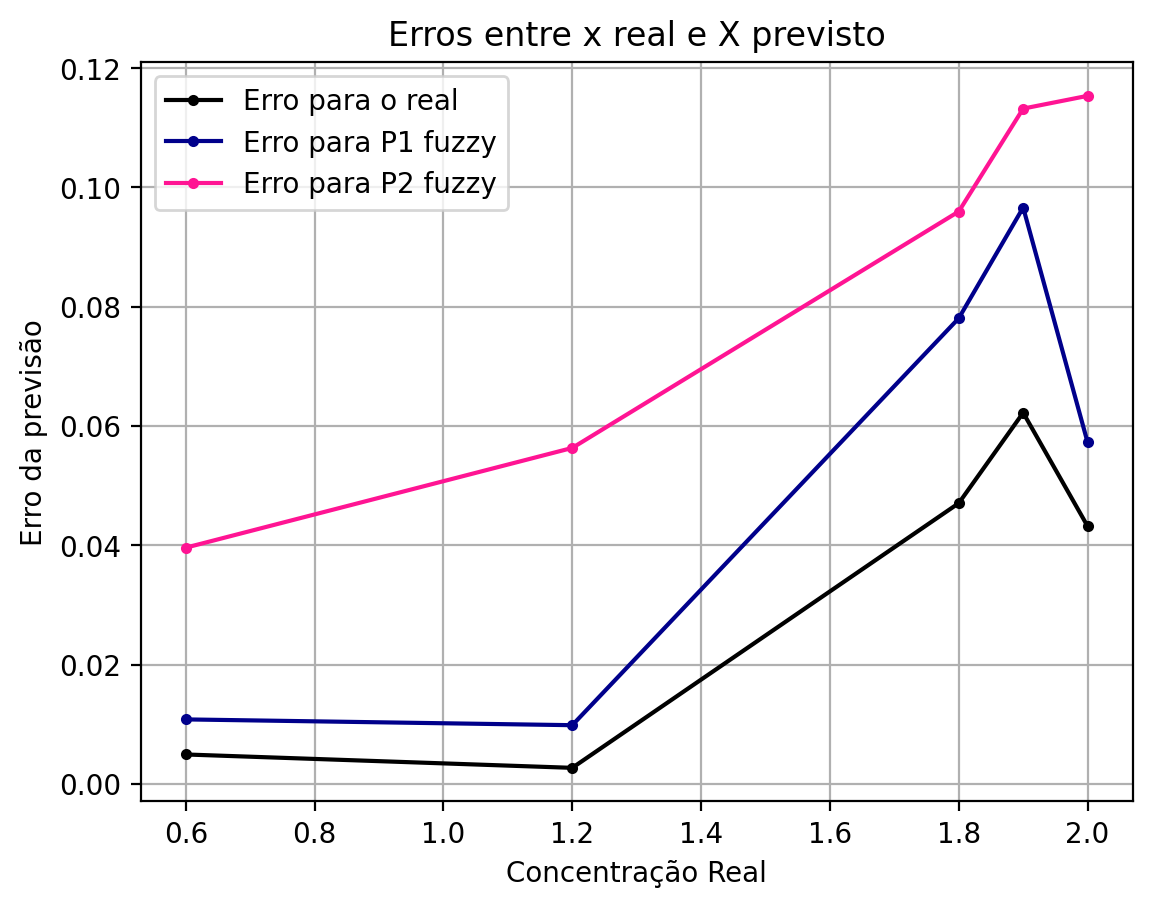

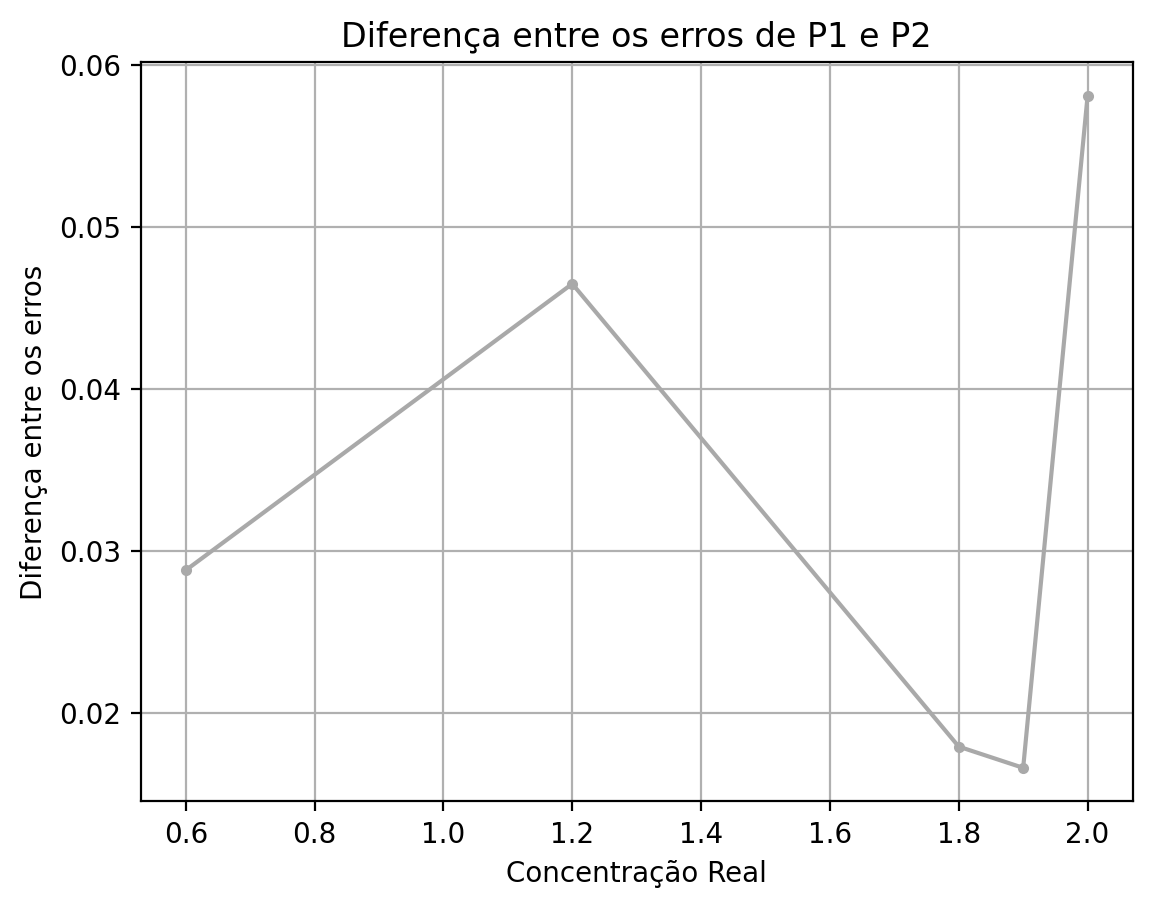

CPU times: total: 188 ms
Wall time: 545 ms


In [9]:
%%time

print("------- REGRESSÃO LINEAR -------")

print(" ")

print(f"Coeficientes do ajuste de curva real:")
print(coefs)

print(" ")

print(f"Coeficientes fuzzy da Solução 1 para o ajuste de curva fuzzy:")
print(sol[0])

print(" ")

print(f"Coeficientes fuzzy da Solução 2 para o ajuste de curva fuzzy:")
print(sol[1])

print(" ")
print(" ") 

print("--- PREVISÃO DE CONCENTRAÇÃO ---")

print(" ")

print(f"Concentrações reais para previsão:")
print(xr_prev)

print(" ")

print(f"Previsão de concentração real:")
print(conc_prev)

print(" ")

print(f"Previsão de concentração fuzzy pela solução 1:")
print(xpt1)

print(" ")

print(f"Previsão de concentração fuzzy pela solução 2:")
print(xpt2)

print(" ")

print("------- MÉTRICAS DE ERRO -------")

print(" ")

print("Erro médio entre x real conhecido e x real previsto (Métrica do máximo): ", err_real)
print("Erro médio entre entre x real conhecido e x previsto para S1 (Métrica de Hausdorff): ", err1)
print("Erro médio entre entre x real conhecido e x previsto para S2 (Métrica de Hausdorff): ", err2)
print("Diferença média entre os erros fuzzy: ", dif_med)

plt.figure(dpi=200)
plt.plot(xr_prev, erros_real, color = "black", label = "Erro para o real", marker = ".")
plt.plot(xr_prev, erros1, color = "darkblue", label="Erro para P1 fuzzy", marker = ".")
plt.plot(xr_prev, erros2, color = "deeppink", label="Erro para P2 fuzzy", marker = ".")
plt.title("Erros entre x real e X previsto")
plt.xlabel("Concentração Real")
plt.ylabel("Erro da previsão")
plt.legend()
plt.grid()
plt.show()

plt.figure(dpi=200)
plt.plot(xr_prev, difs, color = "darkgrey", marker=".")
plt.title("Diferença entre os erros de P1 e P2")
plt.xlabel("Concentração Real")
plt.ylabel("Diferença entre os erros")
plt.grid()
plt.show()